6776
(4743, 3)
(2033, 3)
Training Accuracy:
50.35
Testing Accuracy:
68.96
Confusion Matrix:
[[ 123  411]
 [ 220 1279]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.36      0.23      0.28       534
           1       0.76      0.85      0.80      1499

    accuracy                           0.69      2033
   macro avg       0.56      0.54      0.54      2033
weighted avg       0.65      0.69      0.67      2033

Cross Validation value:
71.24
AUC: 0.586
ROC curve:


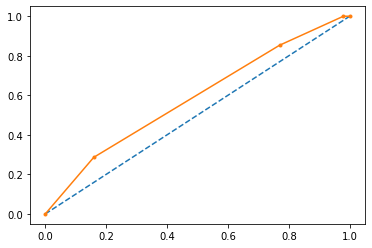

Training Accuracy:
73.54
Testing Accuracy:
73.73
Confusion Matrix:
[[   0  534]
 [   0 1499]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       534
           1       0.74      1.00      0.85      1499

    accuracy                           0.74      2033
   macro avg       0.37      0.50      0.42      2033
weighted avg       0.54      0.74      0.63      2033

Cross Validation value:
73.6
AUC: 0.514
ROC curve:


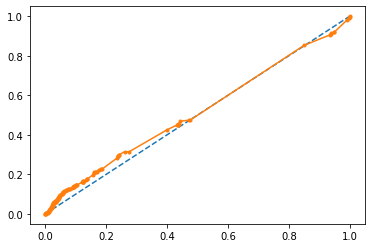

Training Accuracy:
75.65
Testing Accuracy:
76.39
Confusion Matrix:
[[  75  459]
 [  21 1478]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.78      0.14      0.24       534
           1       0.76      0.99      0.86      1499

    accuracy                           0.76      2033
   macro avg       0.77      0.56      0.55      2033
weighted avg       0.77      0.76      0.70      2033

Cross Validation value:
73.21
AUC: 0.671
ROC curve:


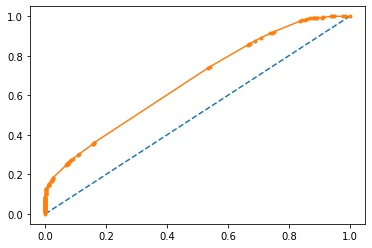

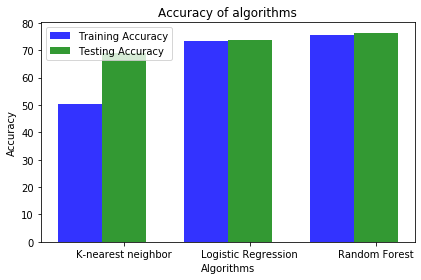

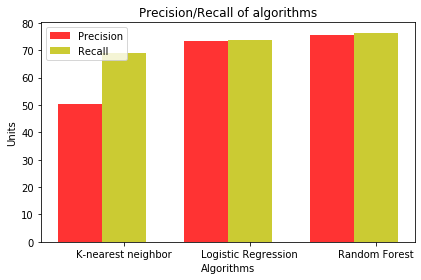

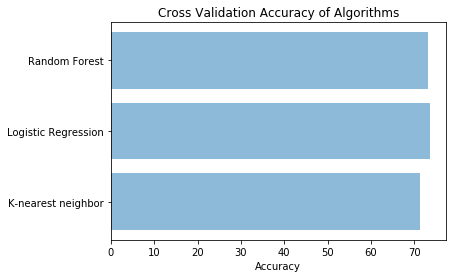

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[144]:


import codecs, json
import pandas as pd
from textblob import TextBlob
import re
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# In[145]:


def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\S+)", " ", tweet).split())

def textbl(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def sent(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.5:
        return 0
    else:
        return 1

with codecs.open('./depression.json', 'r',
                 'utf-8') as f:
    tweets = json.load(f, encoding='utf-8')

list_tweets = [list(elem.values()) for elem in tweets]
list_columns = list(tweets[0].keys())
df = pd.DataFrame(list_tweets, columns=list_columns)

df['Depressed'] = np.array([str(sent(tweet)) for tweet in df['text']])
warnings.filterwarnings('ignore')


# In[146]:


d = df.drop(['user','text','url','fullname','timestamp','id','html'], axis=1)

y = d.Depressed
X = d.drop('Depressed', axis=1)
tot_count = len(df.index)
print(tot_count)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)


# In[161]:


knn = KNeighborsClassifier(n_neighbors = 3)
trained_knn = knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Training Accuracy:")
print(acc_knn)
test_knn = knn.fit(X_test, y_test)
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
print("Testing Accuracy:")
print(acc_test_knn)
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print("Classification Matrix:")
print(metrics.classification_report(y_test, y_pred))
cross_val = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_knn = round(cross_val.mean()*100, 2)
print(cross_val_knn)
probability = knn.predict_proba(X_test)
probs = probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test.astype(float), probs)
sp = 0.0
sr = 0.0
for i in precision:
    sp = sp + i
precision_KNN = sp/len(precision)
for i in recall:
    sr = sr + i
recall_KNN = sp/len(recall)
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("ROC curve:")
plt.show()


# In[162]:


logistic_regression_model = LogisticRegression()
trained_logistic_regression_model = logistic_regression_model.fit(X_train, y_train)
train_LR_accuracy = round (trained_logistic_regression_model.score(X_train, y_train)*100, 2)
print ("Training Accuracy:")
print(train_LR_accuracy)
test_LR_accuracy = round (trained_logistic_regression_model.score(X_test, y_test)*100, 2)
print ("Testing Accuracy:")
print(test_LR_accuracy)
probability = logistic_regression_model.predict_proba(X_test)
predicted = logistic_regression_model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))
print("Classification Matrix:")
print(metrics.classification_report(y_test, predicted))
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_lr = round(cross_val.mean()*100, 2)
print(cross_val_lr)
probability = logistic_regression_model.predict_proba(X_test)
probs = probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test.astype(float), probs)
sp = 0.0
sr = 0.0
for i in precision:
    sp = sp + i
precision_LR = sp/len(precision)
for i in recall:
    sr = sr + i
recall_LR = sp/len(recall)
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("ROC curve:")
plt.show()


# In[163]:


random_forest_model = RandomForestClassifier(n_estimators=600)
trained_random_forest_model = random_forest_model.fit(X_train, y_train)
train_RF_accuracy = round (trained_random_forest_model.score(X_train, y_train)*100, 2)
print ("Training Accuracy:")
print(train_RF_accuracy)
test_random_forest_model = random_forest_model.fit(X_test, y_test)
test_RF_accuracy = round (test_random_forest_model.score(X_test, y_test)*100, 2)
predicted = random_forest_model.predict(X_test)
print ("Testing Accuracy:")
print(test_RF_accuracy)
probability = random_forest_model.predict_proba(X_test)
predicted = random_forest_model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))
print("Classification Matrix:")
print(metrics.classification_report(y_test, predicted))
cross_val = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_rf = round(cross_val.mean()*100, 2)
print(cross_val_rf)
probability = random_forest_model.predict_proba(X_test)
probs = probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test.astype(float), probs)
sp = 0.0
sr = 0.0
for i in precision:
    sp = sp + i
precision_RF = sp/len(precision)
for i in recall:
    sr = sr + i
recall_RF = sp/len(recall)
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("ROC curve:")
plt.show()


# In[177]:


algorithm = ['K-nearest neighbor', 'Logistic Regression', 'Random Forest']
trainaccuracy = [acc_knn, train_LR_accuracy, train_RF_accuracy]
testaccuracy = [acc_test_knn, test_LR_accuracy, test_RF_accuracy]
index = np.arange(len(algorithm))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, trainaccuracy, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Accuracy')
 
rects2 = plt.bar(index + bar_width, testaccuracy, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Testing Accuracy')
 
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of algorithms')
plt.xticks(index + bar_width, algorithm)
plt.legend() 
plt.tight_layout()
plt.show()


# In[178]:


algorithm = ['K-nearest neighbor', 'Logistic Regression', 'Random Forest']
precision = [precision_KNN, precision_LR, precision_RF]
recall = [recall_KNN, recall_LR, recall_RF]
index = np.arange(len(algorithm))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, trainaccuracy, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Precision')
 
rects2 = plt.bar(index + bar_width, testaccuracy, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Recall')
 
plt.xlabel('Algorithms')
plt.ylabel('Units')
plt.title('Precision/Recall of algorithms')
plt.xticks(index + bar_width, algorithm)
plt.legend() 
plt.tight_layout()
plt.show()


# In[176]:


crossvalidationaccuracy = [cross_val_knn, cross_val_lr, cross_val_rf]
y_pos = np.arange(len(algorithm))
 
plt.barh(y_pos, crossvalidationaccuracy, align='center', alpha=0.5)
plt.yticks(y_pos, algorithm)
plt.xlabel('Accuracy')
plt.title('Cross Validation Accuracy of Algorithms')
 
plt.show()


# In[ ]:





